<a href="https://colab.research.google.com/github/Yashs-7/Calculator/blob/main/BTP_2101CE62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

#Data Preprocessing

In [49]:
cols = ['Average Inflow (Qin)',
'Average Outflow (Qout)',
'Energy Consumption (Ec)',
'Ammonia (NH4-N)',
'Biological Oxygen Demand (BOD)','Chemical Oxygen Demand (COD)','Total Nitrogen (TN)','Average Temperature (Tavg)','Maximum temperature (Tmax)',
'Minimum temperature (Tmin)','SLP',
'Atmospheric pressure (AP)',
'Average humidity (H)',
'Total rainfall and / or snowmelt (Pr)',
'Average visibility (VIS)',
'Average wind speed (WSavg)',
'Maximum wind speed (WSmax)',
'Year',
'Month','Day'
]

df = pd.read_csv('Data-Melbourne_F.csv',names = cols)
df_n = pd.read_csv('Data-Melbourne_F.csv',names = cols)

df = df.iloc[1:,:] #removing the 0th row
df.head(3)


,Average Inflow (Qin),Average Outflow (Qout),Energy Consumption (Ec),Ammonia (NH4-N),Biological Oxygen Demand (BOD),Chemical Oxygen Demand (COD),Total Nitrogen (TN),Average Temperature (Tavg),Maximum temperature (Tmax),Minimum temperature (Tmin),SLP,Atmospheric pressure (AP),Average humidity (H),Total rainfall and / or snowmelt (Pr),Average visibility (VIS),Average wind speed (WSavg),Maximum wind speed (WSmax),Year,Month,Day
1,2.941,2.589,175856,27,365,730,60.378,19.3,25.1,12.6,0,56,1.52,10,26.9,53.5,79.5,2014,1,1
2,2.936,2.961,181624,25,370,740,60.026,17.1,23.6,12.3,0,63,0,10,14.4,27.8,0,2014,1,2
3,2.928,3.225,202016,42,418,836,64.522,16.8,27.2,8.8,0,47,0.25,10,31.9,61.1,77.8,2014,1,5


In [50]:
#rearranging the columns
temp_cols = df.columns.tolist()
new_cols = temp_cols[0:14] + temp_cols[15:] + temp_cols[14:15]
df = df[new_cols]
df.head(3)

,Average Inflow (Qin),Average Outflow (Qout),Energy Consumption (Ec),Ammonia (NH4-N),Biological Oxygen Demand (BOD),Chemical Oxygen Demand (COD),Total Nitrogen (TN),Average Temperature (Tavg),Maximum temperature (Tmax),Minimum temperature (Tmin),SLP,Atmospheric pressure (AP),Average humidity (H),Total rainfall and / or snowmelt (Pr),Average wind speed (WSavg),Maximum wind speed (WSmax),Year,Month,Day,Average visibility (VIS)
1,2.941,2.589,175856,27,365,730,60.378,19.3,25.1,12.6,0,56,1.52,10,53.5,79.5,2014,1,1,26.9
2,2.936,2.961,181624,25,370,740,60.026,17.1,23.6,12.3,0,63,0,10,27.8,0,2014,1,2,14.4
3,2.928,3.225,202016,42,418,836,64.522,16.8,27.2,8.8,0,47,0.25,10,61.1,77.8,2014,1,5,31.9


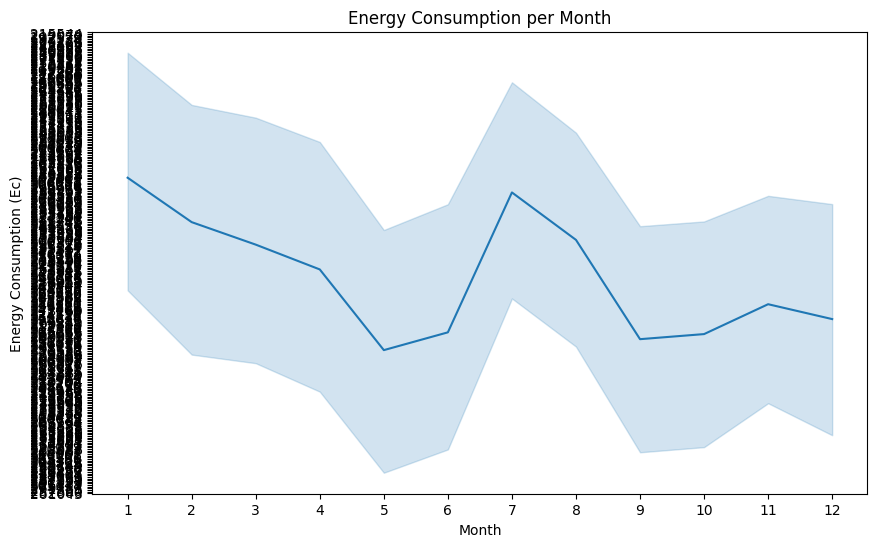

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Energy Consumption (Ec)', data=df)
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Ec)')
plt.title('Energy Consumption per Month')
plt.show()

In [52]:
df.describe()#can drop SLP due to less unique values, not dropping as of now

,Average Inflow (Qin),Average Outflow (Qout),Energy Consumption (Ec),Ammonia (NH4-N),Biological Oxygen Demand (BOD),Chemical Oxygen Demand (COD),Total Nitrogen (TN),Average Temperature (Tavg),Maximum temperature (Tmax),Minimum temperature (Tmin),SLP,Atmospheric pressure (AP),Average humidity (H),Total rainfall and / or snowmelt (Pr),Average wind speed (WSavg),Maximum wind speed (WSmax),Year,Month,Day,Average visibility (VIS)
count,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382
unique,1052,1093,1379,48,214,221,355,230,195,162,6,77,32,56,49,48,6,12,31,198
top,4.347826086956525E-06,3.837,250282,40,340,1000,63.312,11.3,15,9,0,66,0,10,27.8,0,2016,5,19,15.4
freq,22,4,2,90,97,52,36,20,76,82,1377,58,1273,756,122,716,260,133,49,24


In [53]:
df.isnull().sum()#ok

,0
Average Inflow (Qin),0
Average Outflow (Qout),0
Energy Consumption (Ec),0
Ammonia (NH4-N),0
Biological Oxygen Demand (BOD),0
Chemical Oxygen Demand (COD),0
Total Nitrogen (TN),0
Average Temperature (Tavg),0
Maximum temperature (Tmax),0
Minimum temperature (Tmin),0


In [54]:
df.dtypes

,0
Average Inflow (Qin),object
Average Outflow (Qout),object
Energy Consumption (Ec),object
Ammonia (NH4-N),object
Biological Oxygen Demand (BOD),object
Chemical Oxygen Demand (COD),object
Total Nitrogen (TN),object
Average Temperature (Tavg),object
Maximum temperature (Tmax),object
Minimum temperature (Tmin),object


In [55]:
#converting object dtype to numeric
for col in df.columns:
    if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')

nan_cnts = df.isna().sum()
print(nan_cnts)


Average Inflow (Qin)                     0
Average Outflow (Qout)                   0
Energy Consumption (Ec)                  0
Ammonia (NH4-N)                          0
Biological Oxygen Demand (BOD)           0
Chemical Oxygen Demand (COD)             0
Total Nitrogen (TN)                      0
Average Temperature (Tavg)               0
Maximum temperature (Tmax)               0
Minimum temperature (Tmin)               0
SLP                                      0
Atmospheric pressure (AP)                0
Average humidity (H)                     0
Total rainfall and / or snowmelt (Pr)    0
Average wind speed (WSavg)               0
Maximum wind speed (WSmax)               0
Year                                     0
Month                                    0
Day                                      0
Average visibility (VIS)                 0
dtype: int64


In [56]:
# Now convert numeric columns to float64
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].astype('float64')

df.dtypes

,0
Average Inflow (Qin),float64
Average Outflow (Qout),float64
Energy Consumption (Ec),float64
Ammonia (NH4-N),float64
Biological Oxygen Demand (BOD),float64
Chemical Oxygen Demand (COD),float64
Total Nitrogen (TN),float64
Average Temperature (Tavg),float64
Maximum temperature (Tmax),float64
Minimum temperature (Tmin),float64


In [65]:
for col in df_n.columns:
    if df_n[col].dtype == 'object':
            df_n[col] = pd.to_numeric(df_n[col], errors='coerce')

nan_cnts = df_n.isna().sum()
print(nan_cnts)

Average Inflow (Qin)                     1
Average Outflow (Qout)                   1
Energy Consumption (Ec)                  1
Ammonia (NH4-N)                          1
Biological Oxygen Demand (BOD)           1
Chemical Oxygen Demand (COD)             1
Total Nitrogen (TN)                      1
Average Temperature (Tavg)               1
Maximum temperature (Tmax)               1
Minimum temperature (Tmin)               1
SLP                                      1
Atmospheric pressure (AP)                1
Average humidity (H)                     1
Total rainfall and / or snowmelt (Pr)    1
Average visibility (VIS)                 1
Average wind speed (WSavg)               1
Maximum wind speed (WSmax)               1
Year                                     1
Month                                    1
Day                                      1
dtype: int64


In [57]:
df['Energy Consumption (Ec)'] = df['Energy Consumption (Ec)']/1000 #to MWH
df.head(3)

,Average Inflow (Qin),Average Outflow (Qout),Energy Consumption (Ec),Ammonia (NH4-N),Biological Oxygen Demand (BOD),Chemical Oxygen Demand (COD),Total Nitrogen (TN),Average Temperature (Tavg),Maximum temperature (Tmax),Minimum temperature (Tmin),SLP,Atmospheric pressure (AP),Average humidity (H),Total rainfall and / or snowmelt (Pr),Average wind speed (WSavg),Maximum wind speed (WSmax),Year,Month,Day,Average visibility (VIS)
1,2.941,2.589,175.856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,53.5,79.5,2014.0,1.0,1.0,26.9
2,2.936,2.961,181.624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,27.8,0.0,2014.0,1.0,2.0,14.4
3,2.928,3.225,202.016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,61.1,77.8,2014.0,1.0,5.0,31.9


#Feature Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler

y = df['Energy Consumption (Ec)']
df = df.drop('Energy Consumption (Ec)', axis=1)
# Select numerical features for normalization
numerical_features = df.select_dtypes(include=['float64']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the normalized DataFrame
df.head(3)

,Average Inflow (Qin),Average Outflow (Qout),Ammonia (NH4-N),Biological Oxygen Demand (BOD),Chemical Oxygen Demand (COD),Total Nitrogen (TN),Average Temperature (Tavg),Maximum temperature (Tmax),Minimum temperature (Tmin),SLP,Atmospheric pressure (AP),Average humidity (H),Total rainfall and / or snowmelt (Pr),Average wind speed (WSavg),Maximum wind speed (WSmax),Year,Month,Day,Average visibility (VIS)
1,0.371338,0.000000,0.1750,0.316901,0.276119,0.391885,0.543662,0.577011,0.478689,0.0,0.577320,0.084304,0.019531,0.640719,0.738848,0.0,0.0,0.000000,0.547862
2,0.370707,0.022712,0.1500,0.323944,0.283582,0.385115,0.481690,0.542529,0.468852,0.0,0.649485,0.000000,0.019531,0.332934,0.000000,0.0,0.0,0.033333,0.293279
3,0.369697,0.038830,0.3625,0.391549,0.355224,0.471577,0.473239,0.625287,0.354098,0.0,0.484536,0.013866,0.019531,0.731737,0.723048,0.0,0.0,0.133333,0.649695


#Test-Train Split


In [59]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df  # Features are all columns except 'Energy Consumption (Ec)'
 # Target variable is 'Energy Consumption (Ec)'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75% train, 20% test

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1036, 19)
X_test shape: (346, 19)
y_train shape: (1036,)
y_test shape: (346,)


#Modelling without dropping columns

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Predictions on both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    rmse_train = np.sqrt(mse_train)

    # Calculate metrics for testing set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    # Print metrics for training set
    print("Training Data Metrics:")
    #print(f"Mean Absolute Error (MAE): {mae_train}")
    #print(f"Mean Squared Error (MSE): {mse_train}")
    #print(f"Root Mean Squared Error (RMSE): {rmse_train}")
    print(f"R-squared (R^2): {r2_train}")



    # Print metrics for testing set
    print("Testing Data Metrics:")
    print(f"Mean Absolute Error (MAE): {mae_test}")
    print(f"Root Mean Squared Error (RMSE): {rmse_test}")
    print(f"R-squared (R^2): {r2_test}")


    return r2_test




In [61]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.gaussian_process import GaussianProcessRegressor

# Example usage (assuming you have X_train, X_test, y_train, y_test defined)
models = {
    'RF': RandomForestRegressor(),
    'GBM': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'KNN': KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(), #BT, BST -  DecisionTreeRegressor can be used as a base
    'LSVR': LinearSVR(),
    'CSVR': SVR(kernel='linear'), # Linear Kernel for CSVR
    'GSVR': SVR(kernel='rbf'),    # RBF Kernel for GSVR
    'QSVR': SVR(kernel='poly'),    # Polynomial Kernel for QSVR
    'GPRE': GaussianProcessRegressor(),

}


for name, model in models.items():
    print(f"Evaluating model: {name}")
    r2 = evaluate(model, X_train, X_test, y_train, y_test)
    print("-" * 30) # Separator between model evaluations

Evaluating model: RF
Training Data Metrics:
R-squared (R^2): 0.9141094551081488
Testing Data Metrics:
Mean Absolute Error (MAE): 27.989426907514446
Root Mean Squared Error (RMSE): 36.644297349669294
R-squared (R^2): 0.2987744297950585
------------------------------
Evaluating model: GBM
Training Data Metrics:
R-squared (R^2): 0.6299877373275884
Testing Data Metrics:
Mean Absolute Error (MAE): 29.201068420921498
Root Mean Squared Error (RMSE): 38.04816556284483
R-squared (R^2): 0.24401636794379034
------------------------------
Evaluating model: XGBoost
Training Data Metrics:
R-squared (R^2): 0.9991123647398804
Testing Data Metrics:
Mean Absolute Error (MAE): 30.820120305937834
Root Mean Squared Error (RMSE): 39.932715437908314
R-squared (R^2): 0.1672730237602883
------------------------------
Evaluating model: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0

#Feature Selection


In [63]:
#Correlation matrix
correlation_matrix = df_n.corr()

#Heatmap Plot
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#indi correlation
print(correlation_matrix['Energy Consumption (Ec)'].sort_values(ascending=False))


ValueError: could not convert string to float: 'avg_outflow'

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(feature_importance)

                                  Feature  Importance
0                                   Month    0.164269
1                     Total Nitrogen (TN)    0.124532
2                                    Year    0.088693
3                    Average Inflow (Qin)    0.083949
4                  Average Outflow (Qout)    0.064983
5            Chemical Oxygen Demand (COD)    0.063877
6                Average visibility (VIS)    0.048345
7                                     Day    0.046638
8                         Ammonia (NH4-N)    0.043348
9              Minimum temperature (Tmin)    0.042858
10              Atmospheric pressure (AP)    0.040768
11         Biological Oxygen Demand (BOD)    0.040587
12             Average Temperature (Tavg)    0.040537
13             Maximum temperature (Tmax)    0.036457
14             Average wind speed (WSavg)    0.028622
15  Total rainfall and / or snowmelt (Pr)    0.021113
16             Maximum wind speed (WSmax)    0.017669
17                   Average

In [67]:
#Using XGBoost for feature selection

import xgboost as xgb

# Create and train an XGBoost model
xgb_model = xgb.XGBRegressor()  # You can customize parameters here
xgb_model.fit(X_train, y_train)

# Get feature importances from the trained model
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
})


# Sort the features by importance in descending order
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the feature importances
feature_importance_xgb

,Feature,Importance
0,Month,0.236281
1,Year,0.213588
2,Total Nitrogen (TN),0.082339
3,Chemical Oxygen Demand (COD),0.046482
4,Total rainfall and / or snowmelt (Pr),0.045794
5,Maximum wind speed (WSmax),0.043489
6,Minimum temperature (Tmin),0.040628
7,Maximum temperature (Tmax),0.034332
8,Average Temperature (Tavg),0.030311
9,Biological Oxygen Demand (BOD),0.029042


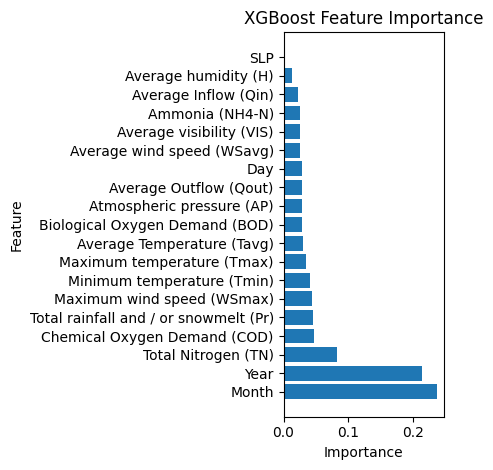

In [68]:
# Assuming feature_importance and feature_importance_xgb DataFrames are already defined


# Plot for XGBoost
plt.subplot(1, 2, 2)
plt.barh(feature_importance_xgb['Feature'], feature_importance_xgb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()

In [69]:
# Convert 'Coefficient' column to float if it's not already
feature_importance['Importance'] = feature_importance['Importance'].astype(float)


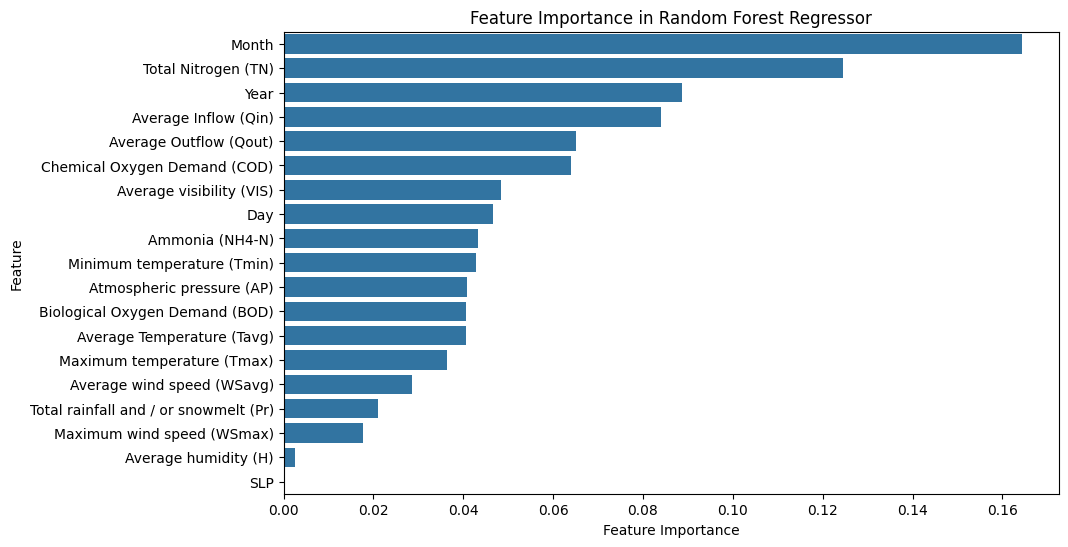

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size for better readability
plt.figure(figsize=(10, 6))

# Plot feature importance using the correct column name
sns.barplot(x='Importance', y='Feature', data=feature_importance)

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')

# Display the plot
plt.show()


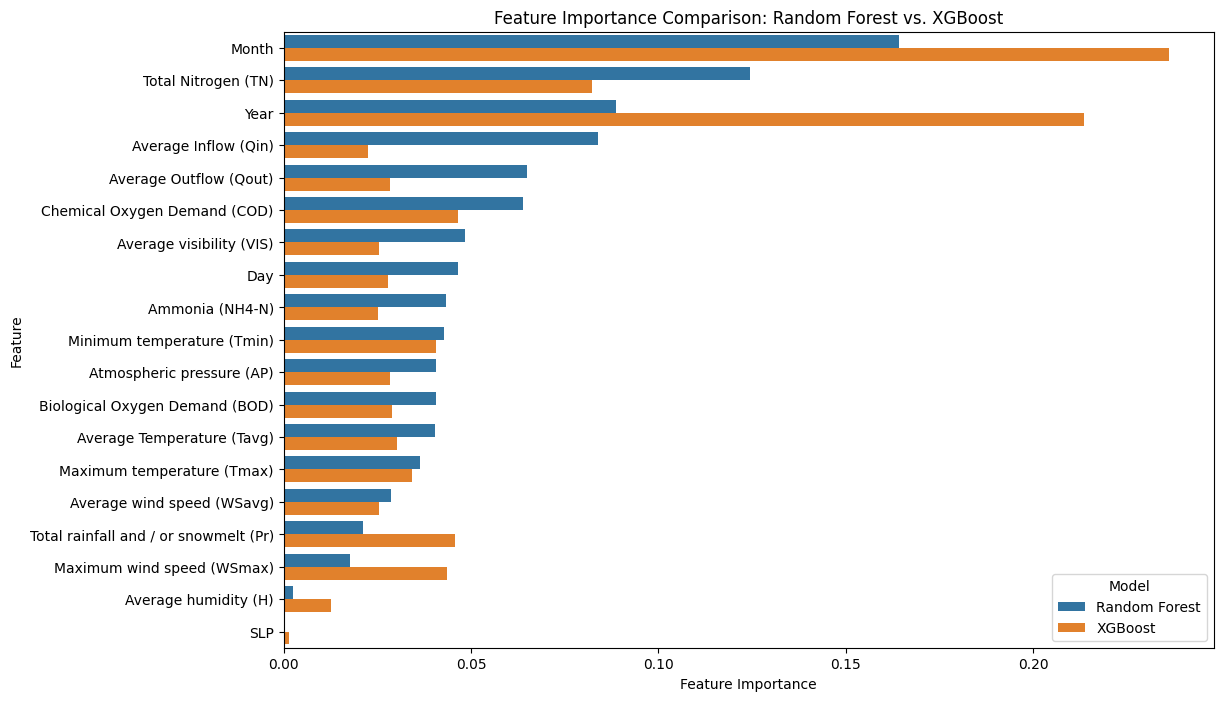

In [71]:
# Assuming feature_importance and feature_importance_xgb DataFrames are already defined

# Combine the DataFrames, adding a 'Model' column
feature_importance['Model'] = 'Random Forest'
feature_importance_xgb['Model'] = 'XGBoost'
combined_importance = pd.concat([feature_importance, feature_importance_xgb])

# Set plot size for better readability
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Plot feature importance using seaborn
sns.barplot(x='Importance', y='Feature', hue='Model', data=combined_importance)

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Comparison: Random Forest vs. XGBoost')

# Display the plot
plt.show()

#Dropping Features

In [73]:
#P&c 1:
features_to_drop = ['SLP', 'Average visibility (VIS)', 'Day', 'Year','Maximum wind speed (WSmax)', 'Average Outflow (Qout)','Average wind speed (WSavg)','Chemical Oxygen Demand (COD)','Minimum temperature (Tmin)','Atmospheric pressure (AP)','Average Temperature (Tavg)']
df_2 = df.drop(columns=features_to_drop)
df_2.head(3)

X = df_2


for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col], errors='coerce')
    except (ValueError, TypeError):
        print(f"Could not convert column '{col}' to numeric. Please check its data type and values.")


In [74]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_1  # Features are all columns except 'Energy Consumption (Ec)'
 # Target variable is 'Energy Consumption (Ec)'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75% train, 20% test

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1036, 8)
X_test shape: (346, 8)
y_train shape: (1036,)
y_test shape: (346,)


In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.gaussian_process import GaussianProcessRegressor

# Example usage (assuming you have X_train, X_test, y_train, y_test defined)
models = {
    'RF': RandomForestRegressor(),
    'GBM': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'KNN': KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(), #BT, BST -  DecisionTreeRegressor can be used as a base
    'LSVR': LinearSVR(),
    'CSVR': SVR(kernel='linear'), # Linear Kernel for CSVR
    'GSVR': SVR(kernel='rbf'),    # RBF Kernel for GSVR
    'QSVR': SVR(kernel='poly'),    # Polynomial Kernel for QSVR
    'GPRE': GaussianProcessRegressor(),

}


for name, model in models.items():
    print(f"Evaluating model: {name}")
    r2 = evaluate(model, X_train, X_test, y_train, y_test)
    print("-" * 30) # Separator between model evaluations

Evaluating model: RF
Training Data Metrics:
R-squared (R^2): 0.9029252469762071
Testing Data Metrics:
Mean Absolute Error (MAE): 30.19095632947977
Root Mean Squared Error (RMSE): 38.80280167950556
R-squared (R^2): 0.21373106853378188
------------------------------
Evaluating model: GBM
Training Data Metrics:
R-squared (R^2): 0.5569768043180062
Testing Data Metrics:
Mean Absolute Error (MAE): 30.655533198385612
Root Mean Squared Error (RMSE): 39.30160245849616
R-squared (R^2): 0.19338654169697667
------------------------------
Evaluating model: XGBoost
Training Data Metrics:
R-squared (R^2): 0.9922145346850787
Testing Data Metrics:
Mean Absolute Error (MAE): 31.584480933040556
Root Mean Squared Error (RMSE): 40.660729588878375
R-squared (R^2): 0.1366333251742794
------------------------------
Evaluating model: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

In [76]:
#P&c 2:
features_to_drop = ['SLP', 'Average visibility (VIS)', 'Day','Maximum wind speed (WSmax)','Average wind speed (WSavg)','Chemical Oxygen Demand (COD)','Maximum temperature (Tmax)','Atmospheric pressure (AP)','Average Temperature (Tavg)']
df_1 = df.drop(columns=features_to_drop)
df_1.head(3)

X = df_1


for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col], errors='coerce')
    except (ValueError, TypeError):
        print(f"Could not convert column '{col}' to numeric. Please check its data type and values.")


In [77]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_1  # Features are all columns except 'Energy Consumption (Ec)'
 # Target variable is 'Energy Consumption (Ec)'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75% train, 20% test

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1036, 10)
X_test shape: (346, 10)
y_train shape: (1036,)
y_test shape: (346,)


In [78]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.gaussian_process import GaussianProcessRegressor

# Example usage (assuming you have X_train, X_test, y_train, y_test defined)
models = {
    'RF': RandomForestRegressor(),
    'GBM': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'KNN': KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(), #BT, BST -  DecisionTreeRegressor can be used as a base
    'LSVR': LinearSVR(),
    'CSVR': SVR(kernel='linear'), # Linear Kernel for CSVR
    'GSVR': SVR(kernel='rbf'),    # RBF Kernel for GSVR
    'QSVR': SVR(kernel='poly'),    # Polynomial Kernel for QSVR
    'GPRE': GaussianProcessRegressor(),

}


for name, model in models.items():
    print(f"Evaluating model: {name}")
    r2 = evaluate(model, X_train, X_test, y_train, y_test)
    print("-" * 30) # Separator between model evaluations

Evaluating model: RF
Training Data Metrics:
R-squared (R^2): 0.9088474015746418
Testing Data Metrics:
Mean Absolute Error (MAE): 27.32450381502889
Root Mean Squared Error (RMSE): 35.65602386101284
R-squared (R^2): 0.33608761459687364
------------------------------
Evaluating model: GBM
Training Data Metrics:
R-squared (R^2): 0.6091206726499729
Testing Data Metrics:
Mean Absolute Error (MAE): 28.351492275288813
Root Mean Squared Error (RMSE): 37.03911436475269
R-squared (R^2): 0.2835825843141173
------------------------------
Evaluating model: XGBoost
Training Data Metrics:
R-squared (R^2): 0.9972524150371155
Testing Data Metrics:
Mean Absolute Error (MAE): 28.4213555897619
Root Mean Squared Error (RMSE): 37.5429590120475
R-squared (R^2): 0.2639591033309999
------------------------------
Evaluating model: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 

#Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - R-squared: {r2_rf}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Random Forest - R-squared: 0.353175908172647
